In [26]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline


In [27]:
#using pandas to read the data 
data = pd.read_csv('mnist_train.csv')
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


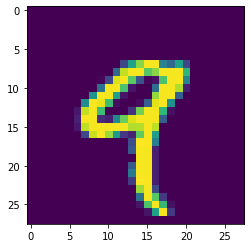

In [28]:
#extracting data from the dataset and viewing them
a = data.iloc[4, 1:].values
a = a.reshape(28,28).astype('uint8')
plt.imshow(a)

In [29]:
#preparing the data
#separating the labels and the values
df_x = data.iloc[:, 1:]
df_y = data.iloc[:, 0]

In [30]:
#creating test and train batches
X_train, x_test, Y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [31]:
#check data
y_test.head()

41382    2
20883    7
13621    6
41823    1
33839    8
Name: label, dtype: int64

In [34]:
#call randomforest classifier
rf = RandomForestClassifier(n_estimators=100)

#fit the model
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
#prediction on test data
pred = rf.predict(x_test)
pred

array([2, 7, 6, ..., 6, 4, 2], dtype=int64)

In [40]:
#check prediciton accuracy
s = y_test.values
count = 0
#clac no. of correctly predicted values
for i in range(len(pred)):
    if pred[i] == s[i]:
        count = count+1
count

11596

In [41]:
#total values that prediciton was run on
len(pred)

12000

In [42]:
accuracy = (count/len(pred))*100
accuracy

96.63333333333334